In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import os

from lib.lib import Import_data

path = Import_data()
# get all files in the directory
files = os.listdir(path)
print(files)

c:\Users\kskdu\Desktop\ntnu\eit\eit\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Path to dataset files: C:\Users\kskdu\.cache\kagglehub\datasets\arashnic\earthquake-magnitude-damage-and-impact\versions\6
['csv_building_damage_assessment.csv', 'csv_building_ownership_and_use.csv', 'csv_building_structure.csv', 'csv_household_demographics.csv', 'csv_household_earthquake_impact.csv', 'csv_household_resources.csv', 'csv_individual_demographics.csv', 'mapping.csv', 'ward_vdcmun_district_name_mapping.csv']


In [4]:
building_structure = pd.read_csv(path + "/csv_building_structure.csv")

In [5]:
building_structure.keys()

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [6]:
selected_columns = ["count_floors_pre_eq",
                    "age_building", 
                    "plinth_area_sq_ft",
                    "foundation_type",
                    "plan_configuration",
                    "has_superstructure_adobe_mud",
                    "has_superstructure_mud_mortar_stone",
                    "has_superstructure_stone_flag",
                    "has_superstructure_cement_mortar_stone",
                    "has_superstructure_mud_mortar_brick",
                    "has_superstructure_cement_mortar_brick",
                    "has_superstructure_timber",
                    "has_superstructure_bamboo",
                    "has_superstructure_rc_non_engineered",
                    "has_superstructure_rc_engineered",
                    "has_superstructure_other",
                    "damage_grade"]

df_reduced = building_structure[selected_columns].copy()

In [7]:
# I need a table of the building age distribution. In the ranges of of 50. So like 0-50, 50-100 and soon

df_reduced["age_building"].describe()


count    762106.000000
mean         24.326405
std          65.043704
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

In [8]:
df_reduced.query("age_building <= 199", inplace=True)

In [9]:
df_reduced

,count_floors_pre_eq,age_building,plinth_area_sq_ft,foundation_type,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,9,288,Other,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Grade 3
1,1,15,364,Other,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Grade 5
2,1,20,384,Other,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 2
3,1,20,312,Other,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 2
4,1,30,308,Other,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,60,165,Mud mortar-Stone/Brick,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 5
762102,2,35,342,Mud mortar-Stone/Brick,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 5
762103,2,35,342,Mud mortar-Stone/Brick,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 5
762104,2,19,306,Mud mortar-Stone/Brick,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Grade 5


In [10]:
df_reduced["foundation_type"].value_counts()

foundation_type
Mud mortar-Stone/Brick    625715
Bamboo/Timber              57435
Cement-Stone/Brick         39019
RC                         32060
Other                       4472
Name: count, dtype: int64

In [11]:
df_one_hot = pd.get_dummies(df_reduced, columns=["foundation_type", "plan_configuration"])

In [12]:
df_one_hot

,count_floors_pre_eq,age_building,plinth_area_sq_ft,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,1,9,288,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,1,15,364,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,20,384,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,1,20,312,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,30,308,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,60,165,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762102,2,35,342,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762103,2,35,342,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762104,2,19,306,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


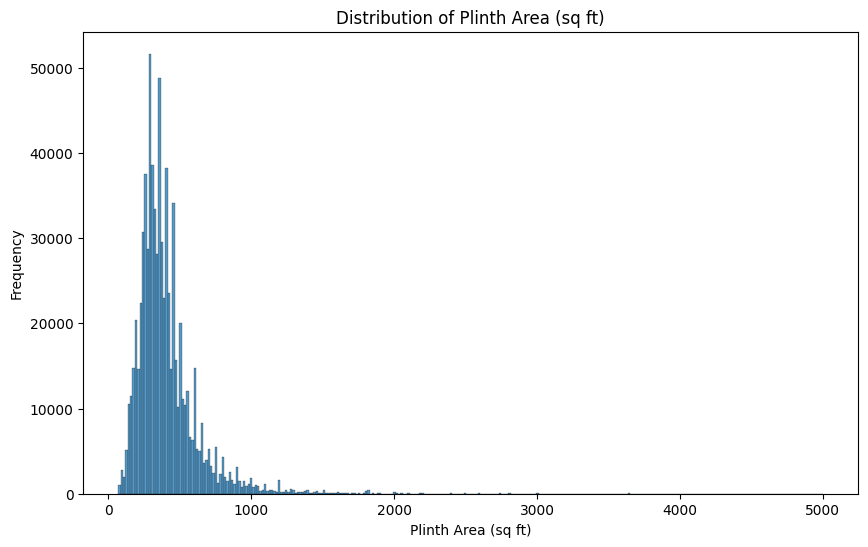

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))
sns.histplot(df_one_hot['plinth_area_sq_ft'], kde=False, bins=300)  # adjust bins as needed
plt.title('Distribution of Plinth Area (sq ft)')
plt.xlabel('Plinth Area (sq ft)')
plt.ylabel('Frequency')
plt.show()

In [14]:
k = 0
b = 0
for i in df_one_hot["plinth_area_sq_ft"]:
    if i < 10:
        if i > b:
            b = i
        k += 1
        print(i)

print("Count:", k)
print("Biggest:", b)

Count: 0
Biggest: 0


In [15]:
# Conclustion, restrict the plinth area to 0-1500 sq ft
df_one_hot.query("plinth_area_sq_ft <= 1500", inplace=True)

In [16]:
df_one_hot["damage_grade"].value_counts()

damage_grade
Grade 5    274079
Grade 4    182711
Grade 3    135183
Grade 2     86137
Grade 1     77153
Name: count, dtype: int64

In [17]:
# Transform the plinth area column so that the values are normilzed
# divide it by 1500
df_one_hot["plinth_area_sq_ft"] = df_one_hot["plinth_area_sq_ft"] / 1500

In [18]:
df_one_hot["plinth_area_sq_ft"]

0         0.192000
1         0.242667
2         0.256000
3         0.208000
4         0.205333
            ...   
762101    0.110000
762102    0.228000
762103    0.228000
762104    0.204000
762105    0.560000
Name: plinth_area_sq_ft, Length: 755274, dtype: float64

In [19]:
df_one_hot

,count_floors_pre_eq,age_building,plinth_area_sq_ft,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,1,9,0.192000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,1,15,0.242667,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,20,0.256000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,1,20,0.208000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,30,0.205333,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,60,0.110000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762102,2,35,0.228000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762103,2,35,0.228000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762104,2,19,0.204000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


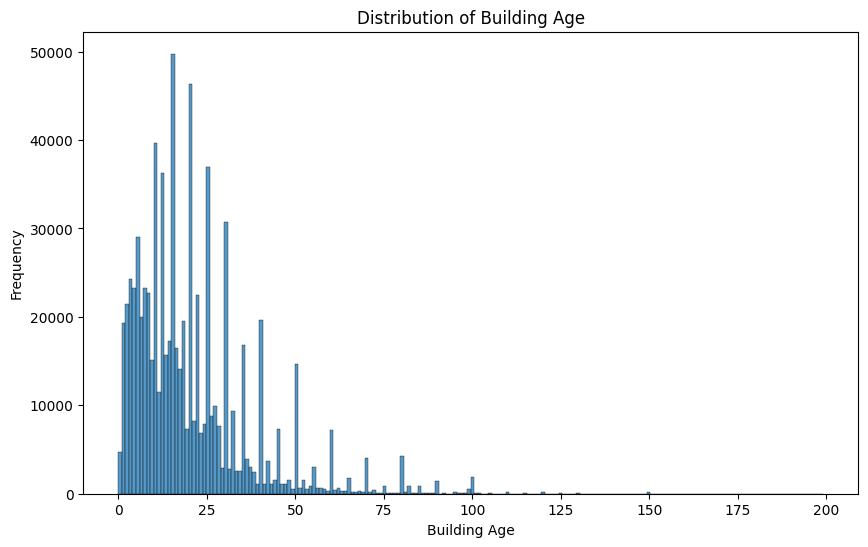

In [20]:
# plot the distribution of the building age
plt.figure(figsize=(10, 6))
sns.histplot(df_one_hot['age_building'], kde=False, bins=200)  # adjust bins as needed
plt.title('Distribution of Building Age')
plt.xlabel('Building Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
df_one_hot.query("age_building <= 100", inplace=True)

In [22]:
df_one_hot["age_building"] = df_one_hot["age_building"] / 100

In [23]:
df_one_hot

,count_floors_pre_eq,age_building,plinth_area_sq_ft,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,...,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,1,0.09,0.192000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,1,0.15,0.242667,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,0.20,0.256000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,1,0.20,0.208000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,1,0.30,0.205333,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,0.60,0.110000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762102,2,0.35,0.228000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762103,2,0.35,0.228000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
762104,2,0.19,0.204000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


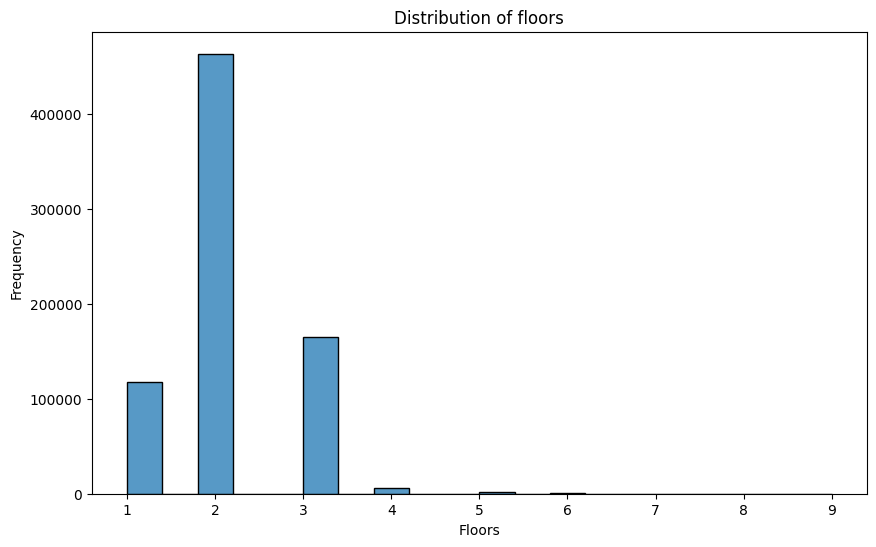

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_one_hot['count_floors_pre_eq'], kde=False, bins=20)  # adjust bins as needed
plt.title('Distribution of floors')
plt.xlabel('Floors')
plt.ylabel('Frequency')
plt.show()

In [25]:
k = 0
for i in df_one_hot['count_floors_pre_eq']:
    if i >= 5:
        k += 1
        print(i)

print(k)

9
5
5
5
5
5
5
6
5
6
5
5
5
6
5
5
5
6
5
5
5
5
5
5
5
5
5
5
6
5
6
5
7
7
7
8
5
5
5
5
6
6
5
5
6
5
5
5
7
5
5
5
5
5
5
6
5
5
5
5
5
5
5
5
5
5
6
5
5
5
5
5
5
5
5
5
5
6
5
6
5
5
7
6
6
5
6
6
7
7
7
5
7
7
6
6
5
7
6
5
6
7
6
8
5
6
5
5
6
7
5
6
5
5
7
5
7
5
6
6
6
7
7
6
6
7
6
5
5
6
6
5
7
5
6
5
6
6
5
6
5
6
5
6
5
5
6
6
7
6
8
6
7
5
7
5
7
5
5
6
6
6
6
6
7
5
5
5
5
5
7
5
6
6
6
5
6
6
7
5
5
5
5
5
6
5
5
6
6
5
5
5
6
5
6
5
5
6
5
5
5
6
5
5
7
5
5
5
7
5
7
5
5
6
5
6
5
6
5
5
5
5
5
5
5
5
6
5
6
5
5
5
5
6
5
6
5
6
5
5
7
6
5
5
5
5
5
5
5
5
5
5
5
7
5
6
5
7
6
5
5
5
5
6
5
6
5
5
5
5
5
5
5
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
5
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
5
5
5
5
6
6
7
5
5
5
5
5
6
5
5
5
9
6
6
9
6
5
5
5
7
6
5
6
5
5
5
5
5
5
5
5
5
5
6
5
6
5
5
6
5
5
5
5
5
5
5
6
5
5
7
5
5
5
5
5
6
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
5
5
5
5
6
5
6
6
5
6
6
5
5
5
6
5
5
5
5
5
5
6
5
5
5
5
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
5
6
5
5
5
5
6
5
5
6
5
6
5
5
6
6
6
6
6
6
5
5
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
5
5
5
5
5
5
5
6
6
5
5
6
5
5
5
5


In [26]:
df_one_hot.query("count_floors_pre_eq <= 5", inplace=True)

In [27]:
df_one_hot["count_floors_pre_eq"] = df_one_hot["count_floors_pre_eq"] / 5

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
# turn the damage grade into a numerical value 1-5
df_one_hot["damage_grade"] = df_one_hot["damage_grade"].replace({"Grade 1": 1, "Grade 2": 2, "Grade 3": 3, "Grade 4": 4, "Grade 5": 5})

C:\Users\kskdu\AppData\Local\Temp\ipykernel_6312\2755490692.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


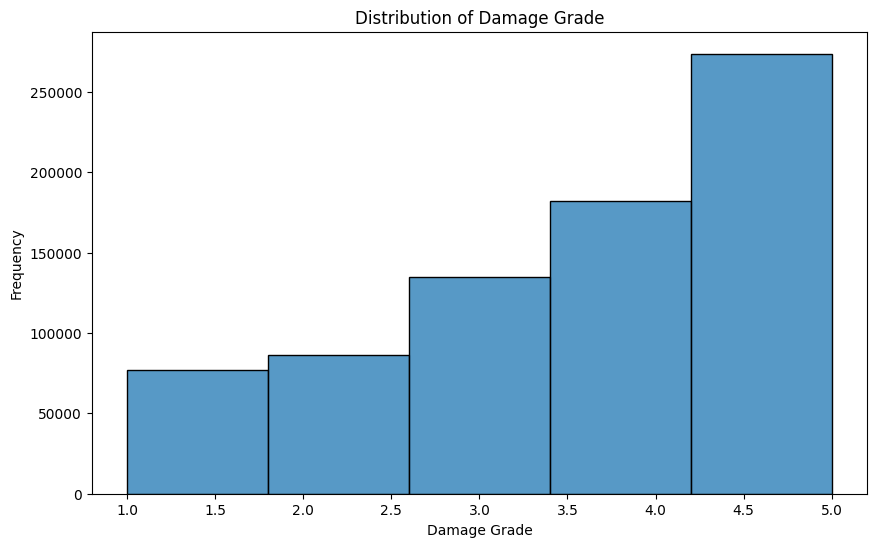

In [30]:
# plot the damage grade distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_one_hot['damage_grade'], kde=False, bins=5)  # adjust bins as needed
plt.title('Distribution of Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.show()


In [31]:
# remove the nan rows with nan for damage grade
df_one_hot = df_one_hot.dropna()

In [32]:
df_one_hot.describe()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000,753719.000000
mean,0.416813,0.200833,0.265850,0.042069,0.803538,0.034842,0.015693,0.022644,0.070065,0.259630,0.081143,0.039001,0.015209,0.012097,3.649685
std,0.129013,0.163449,0.127914,0.200746,0.397322,0.183379,0.124284,0.148765,0.255256,0.438432,0.273055,0.193598,0.122382,0.109321,1.339466
min,0.200000,0.000000,0.046667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,0.090000,0.186667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.400000,0.160000,0.236667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.400000,0.260000,0.310000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [33]:
# I need to prepare the data for the machine learning model, we want to train to predict the damage grade.
# use convert the pandas dataframe to a numpy array with a seperate array for the labels
# the labels are the damage grade
# the features are all the other columns
# the labels are the last column
labels = df_one_hot["damage_grade"].to_numpy()
features = df_one_hot.drop(columns=["damage_grade"]).to_numpy()

In [34]:
df_one_hot

,count_floors_pre_eq,age_building,plinth_area_sq_ft,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,0.2,0.09,0.192000,0,1,0,0,0,0,0,1,0,0,0,3.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
1,0.2,0.15,0.242667,0,1,0,0,0,0,0,1,0,0,0,5.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
2,0.2,0.20,0.256000,0,1,0,0,0,0,0,0,0,0,0,2.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,0.2,0.20,0.208000,0,1,0,0,0,0,0,0,0,0,0,2.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,0.2,0.30,0.205333,0,1,0,0,0,0,0,0,0,0,0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,0.4,0.60,0.110000,0,1,0,0,0,0,0,0,0,0,0,5.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
762102,0.4,0.35,0.228000,0,1,0,0,0,0,0,0,0,0,0,5.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
762103,0.4,0.35,0.228000,0,1,0,0,0,0,0,0,0,0,0,5.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
762104,0.4,0.19,0.204000,0,1,0,0,0,0,0,0,0,0,0,5.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [35]:
labels

array([3., 5., 2., ..., 5., 5., 5.], shape=(753719,))

In [36]:
# find if labels has any invalid data. nan values
np.isnan(labels).any()
# find how many
np.isnan(labels).sum()

np.int64(0)

In [37]:
features

array([[0.2, 0.09, 0.192, ..., False, False, False],
       [0.2, 0.15, 0.24266666666666667, ..., False, False, False],
       [0.2, 0.2, 0.256, ..., False, False, False],
       ...,
       [0.4, 0.35, 0.228, ..., False, False, False],
       [0.4, 0.19, 0.204, ..., False, False, False],
       [0.4, 0.12, 0.56, ..., False, False, False]],
      shape=(753719, 29), dtype=object)

In [38]:
# Ok spillit the data into a training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [39]:
# Ok now we can train a model. Do a basic linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# Ok now we can test the model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

1.2348994870731769

In [40]:
def get_abs_error(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

In [41]:
def get_accuracies_per_label(y_test, y_pred):
    y_pred_rounded = np.floor(y_pred + 0.5).astype(int)

    # Then clip the values to ensure they are within the desired range [1, 5]
    y_pred_int = np.clip(y_pred_rounded, 1, 5)

    error_dict = {}
    error_dict[(1, "hit_count")] = 0
    error_dict[(2, "hit_count")] = 0
    error_dict[(3, "hit_count")] = 0
    error_dict[(4, "hit_count")] = 0
    error_dict[(5, "hit_count")] = 0

    error_dict[(1, "total_count")] = 0
    error_dict[(2, "total_count")] = 0
    error_dict[(3, "total_count")] = 0
    error_dict[(4, "total_count")] = 0
    error_dict[(5, "total_count")] = 0

    for t, p in zip(y_test, y_pred_int):
        if t == p:
            error_dict[(t, "hit_count")] += 1

        error_dict[(t, "total_count")] += 1

    for i in range(1, 6):
        error_dict[(i, "accuracy")] = error_dict[(i, "hit_count")] / error_dict[(i, "total_count")]

    return error_dict

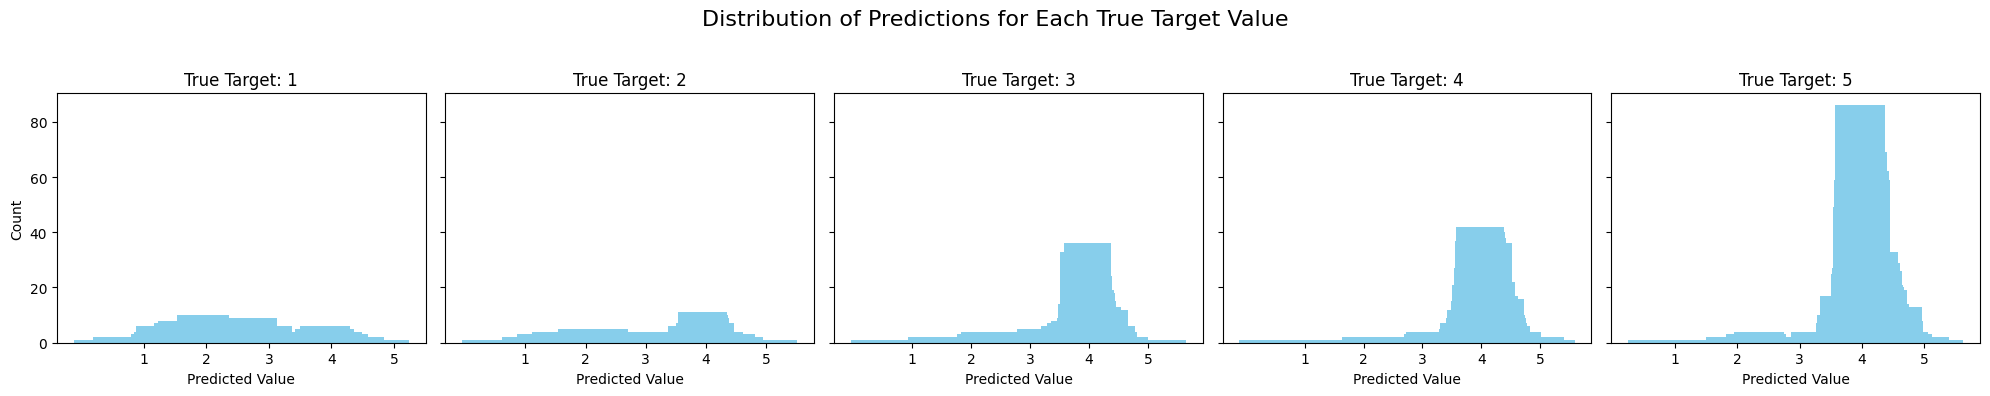

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming y_test and y_pred are NumPy arrays or pandas Series.
# For this example, let's assume they are NumPy arrays.
# If they are pandas Series, the code below still works.

# Define the target values (assuming they are 1 to 5)
targets = np.arange(1, 6)

# Create a subplot for each target value
fig, axes = plt.subplots(nrows=1, ncols=len(targets), figsize=(20, 4), sharey=True)

for ax, target in zip(axes, targets):
    # Filter indices where the true target equals the current target
    indices = (y_test == target)
    
    # Get predictions corresponding to these indices
    preds_for_target = y_pred[indices]
    
    # Count how many times each prediction appears
    counts = pd.Series(preds_for_target).value_counts().sort_index()
    
    # Plot a bar chart
    ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_title(f"True Target: {target}")
    ax.set_xlabel("Predicted Value")
    ax.set_xticks(targets)  # ensure x-axis ticks cover all values 1-5
    if ax is axes[0]:
        ax.set_ylabel("Count")
    
plt.suptitle("Distribution of Predictions for Each True Target Value", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [43]:
get_accuracies_per_label(y_test, y_pred)

{(1, 'hit_count'): 1604,
 (2, 'hit_count'): 4567,
 (3, 'hit_count'): 3210,
 (4, 'hit_count'): 31812,
 (5, 'hit_count'): 1182,
 (1, 'total_count'): 15339,
 (2, 'total_count'): 17200,
 (3, 'total_count'): 26922,
 (4, 'total_count'): 36440,
 (5, 'total_count'): 54843,
 (1, 'accuracy'): 0.10457005019883955,
 (2, 'accuracy'): 0.2655232558139535,
 (3, 'accuracy'): 0.11923334076220192,
 (4, 'accuracy'): 0.8729967069154775,
 (5, 'accuracy'): 0.021552431486242547}

In [44]:
print(y_pred)

[3.97848797 3.92741841 3.90518168 ... 3.25885731 3.94381027 3.9230218 ]


In [45]:
y_pred_rounded = np.floor(y_pred + 0.5).astype(int)

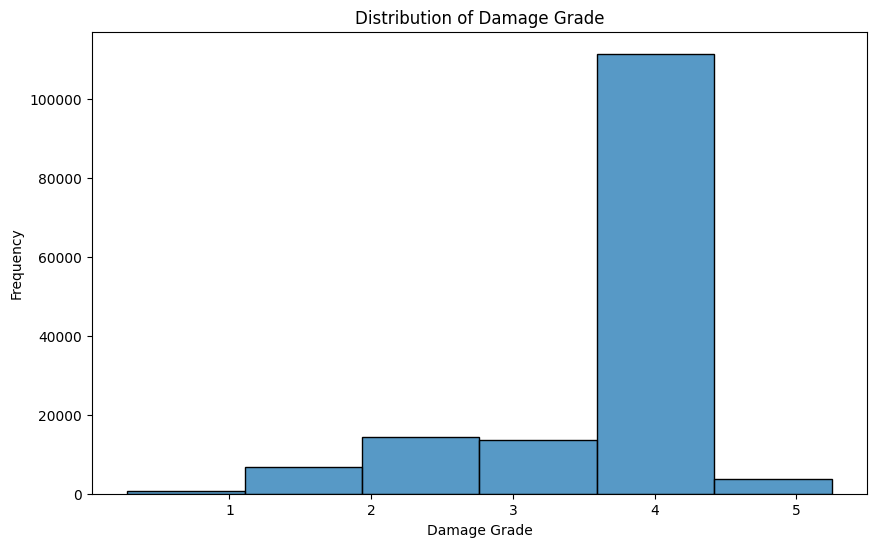

In [46]:
# plot the damage grade distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=False, bins=6)  # adjust bins as needed
plt.title('Distribution of Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.show()


In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier (for multi-class, specify multi_class parameter if needed)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)

# Fit the model
clf.fit(X_train, y_train)

# Get the predicted probabilities for the test set
probs = clf.predict_proba(X_test)

# probs is an array of shape (n_samples, 5) where each row sums to 1.
print(probs)

c:\Users\kskdu\Desktop\ntnu\eit\eit\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.


[[0.0350502  0.08144781 0.16785199 0.26014314 0.45550687]
 [0.04902817 0.09060535 0.166498   0.24654823 0.44732024]
 [0.0078038  0.05213034 0.20876964 0.37899834 0.35229788]
 ...
 [0.06727785 0.14205015 0.27712282 0.2720892  0.24145997]
 [0.01957267 0.09914245 0.17520892 0.24348539 0.46259057]
 [0.04795055 0.09101479 0.1698195  0.24792748 0.44328767]]


In [48]:
# get the MSE
y_pred = clf.predict(X_test)

mean_squared_error(y_test, y_pred)

2.1285954996550442

In [49]:
y_pred

array([5., 5., 4., ..., 3., 5., 5.], shape=(150744,))

In [50]:
get_abs_error(y_test, y_pred)

np.float64(0.9749973464947195)

In [51]:
get_accuracies_per_label(y_test, y_pred)

{(1, 'hit_count'): 9906,
 (2, 'hit_count'): 493,
 (3, 'hit_count'): 1941,
 (4, 'hit_count'): 2106,
 (5, 'hit_count'): 51065,
 (1, 'total_count'): 15339,
 (2, 'total_count'): 17200,
 (3, 'total_count'): 26922,
 (4, 'total_count'): 36440,
 (5, 'total_count'): 54843,
 (1, 'accuracy'): 0.6458048112654019,
 (2, 'accuracy'): 0.02866279069767442,
 (3, 'accuracy'): 0.07209716960106975,
 (4, 'accuracy'): 0.05779363336992316,
 (5, 'accuracy'): 0.9311124482614007}

In [52]:
def plot_confusion_matrix(y_test, y_pred):
    targets = np.arange(1, 6)

    # Create a subplot for each target value
    fig, axes = plt.subplots(nrows=1, ncols=len(targets), figsize=(20, 4), sharey=True)

    for ax, target in zip(axes, targets):
        # Filter indices where the true target equals the current target
        indices = (y_test == target)
        
        # Get predictions corresponding to these indices
        preds_for_target = y_pred[indices]
        
        # Count how many times each prediction appears
        counts = pd.Series(preds_for_target).value_counts().sort_index()
        
        # Plot a bar chart
        ax.bar(counts.index, counts.values, color='skyblue')
        ax.set_title(f"True Target: {target}")
        ax.set_xlabel("Predicted Value")
        ax.set_xticks(targets)  # ensure x-axis ticks cover all values 1-5
        if ax is axes[0]:
            ax.set_ylabel("Count")
        
    plt.suptitle("Distribution of Predictions for Each True Target Value", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

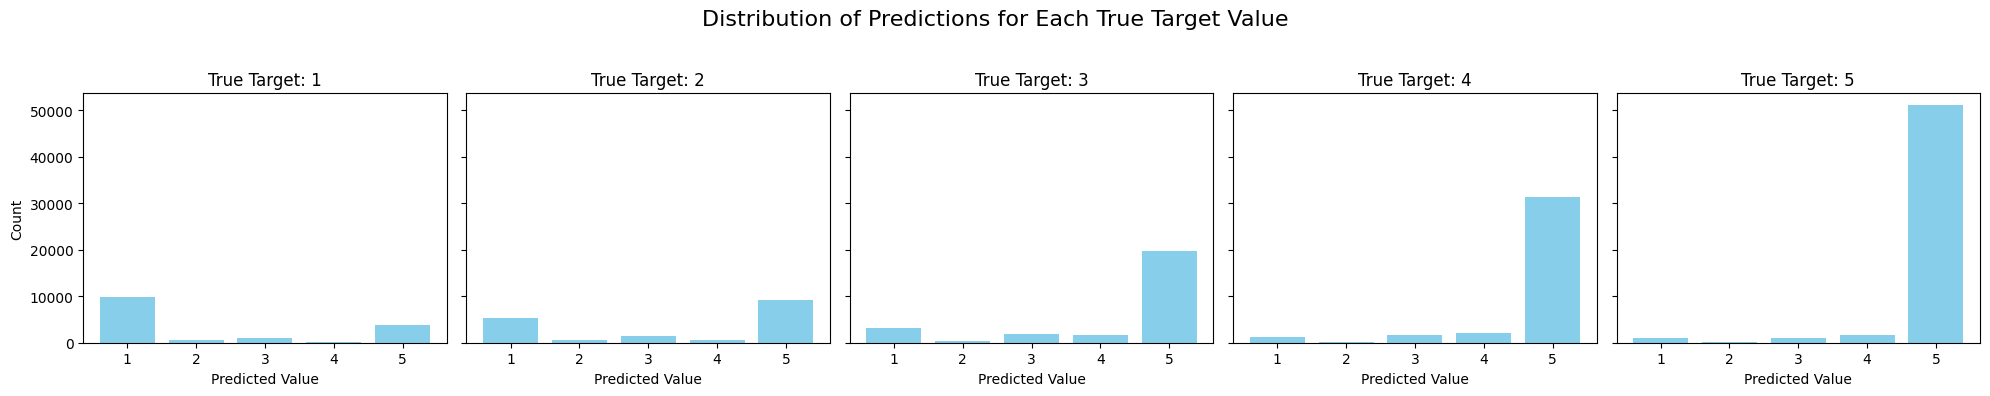

In [53]:
plot_confusion_matrix(y_test, y_pred)

In [54]:
X_test[0]

array([0.4, 0.16, 0.18, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, False, False,
       True, False, False, False, False, False, False, False, False, True,
       False, False, False], dtype=object)

Iteration 1, loss = 1.31494399
Iteration 2, loss = 1.30415577


c:\Users\kskdu\Desktop\ntnu\eit\eit\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.


[[0.02262433 0.07131785 0.17358028 0.28038869 0.45208885]
 [0.04133944 0.09300087 0.18389069 0.25808362 0.42368537]
 [0.01389777 0.06459149 0.22346124 0.33450884 0.36354067]
 ...
 [0.04976059 0.13178187 0.29192178 0.30933257 0.21720318]
 [0.01402353 0.05976038 0.15310226 0.23442944 0.53868439]
 [0.03813975 0.09228492 0.18986828 0.26739191 0.41231514]]


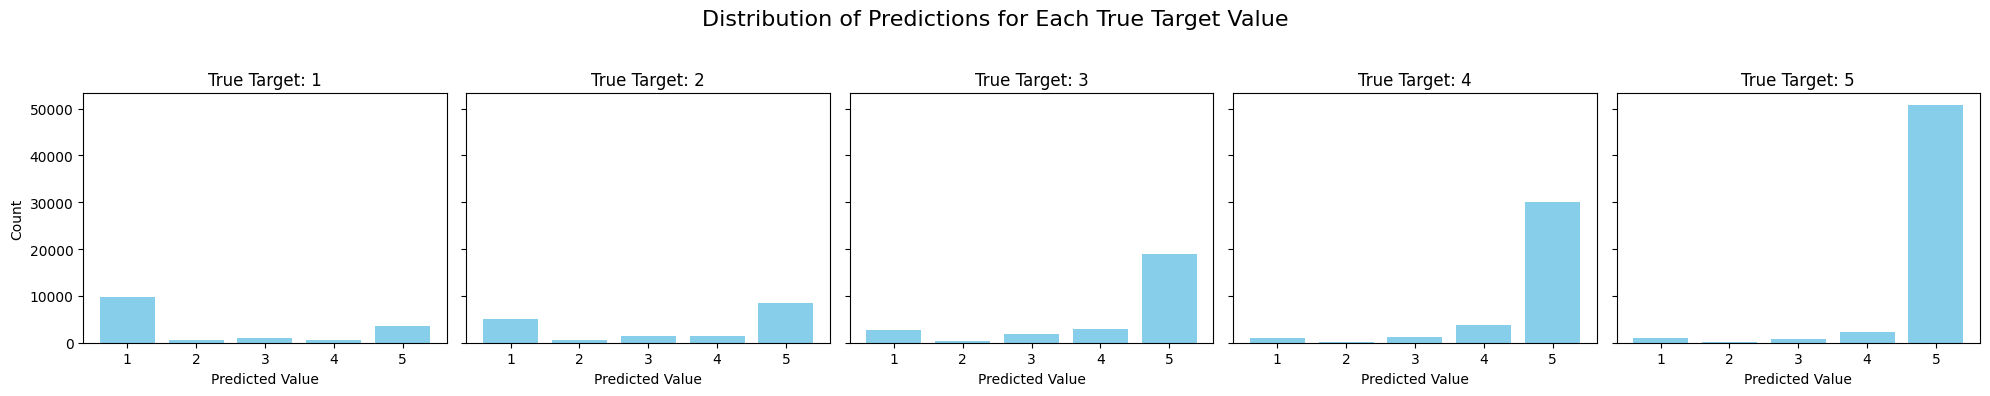

In [55]:
# Create a mlp model instead

from sklearn.neural_network import MLPClassifier

# Initialize the classifier
# Add more hidden layers by adding more numbers to the tuple
# Add loss tracking
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=2, verbose=True)

# Fit the model
clf.fit(X_train, y_train)

# Get the predicted probabilities for the test set
probs = clf.predict_proba(X_test)

# probs is an array of shape (n_samples, 5) where each row sums to 1.
print(probs)

# get the MSE
y_pred = clf.predict(X_test)

mean_squared_error(y_test, y_pred)

get_abs_error(y_test, y_pred)

get_accuracies_per_label(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred)

In [56]:
X_train

array([[0.2, 0.01, 0.09933333333333333, ..., False, False, False],
       [0.4, 0.83, 0.468, ..., False, False, False],
       [0.4, 0.12, 0.21, ..., False, False, False],
       ...,
       [0.2, 0.15, 0.17333333333333334, ..., False, False, False],
       [0.2, 0.01, 0.116, ..., False, False, False],
       [0.4, 0.15, 0.23066666666666666, ..., False, False, False]],
      shape=(602975, 29), dtype=object)

In [58]:
# Create a pytorch model instead

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch import Tensor
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")
print("Number of GPUs:", torch.cuda.device_count())


# Define the model

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(29, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 6)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Initialize the model
model = MLP()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Convert the data to PyTorch tensors
X_train = np.array(X_train, dtype=np.float32)  # Ensure numeric dtype
y_train = np.array(y_train, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train)  
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a DataLoader
train_data = list(zip(X_train_tensor, y_train_tensor))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

PyTorch version: 2.6.0+cu126
CUDA available: True
CUDA version: 12.6
GPU name: NVIDIA GeForce RTX 2060
Number of GPUs: 1


Epoch 1, Loss: 1.3609421253204346
Test Loss: 1.3134968280792236
Test Accuracy: 0.43640875816345215
Test Absolute Error: 0.9715942144393921
Test Accuracies per Label: {(1, 'hit_count'): 10077, (2, 'hit_count'): 349, (3, 'hit_count'): 2398, (4, 'hit_count'): 1646, (5, 'hit_count'): 51316, (1, 'total_count'): 15339, (2, 'total_count'): 17200, (3, 'total_count'): 26922, (4, 'total_count'): 36440, (5, 'total_count'): 54843, (1, 'accuracy'): 0.6569528652454528, (2, 'accuracy'): 0.020290697674418604, (3, 'accuracy'): 0.08907213431394399, (4, 'accuracy'): 0.04517014270032931, (5, 'accuracy'): 0.9356891490253998}


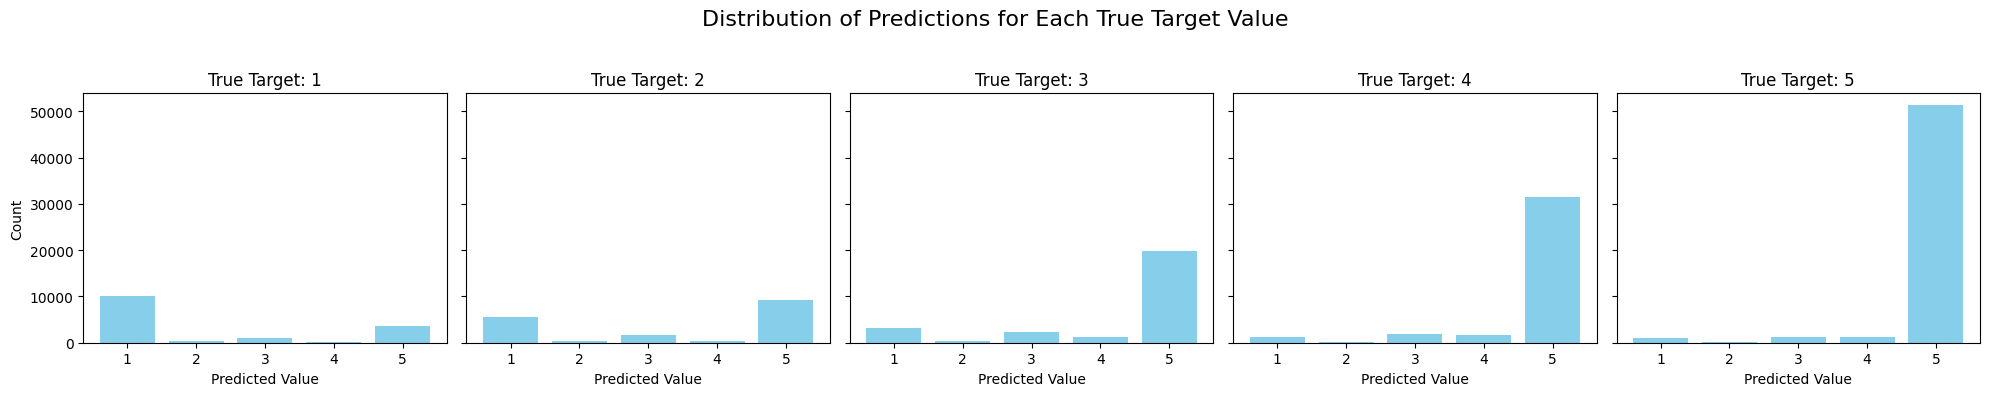

In [ ]:
# Train the model
model.train()
for epoch in range(1):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
with torch.no_grad():
    output = model(X_test_tensor)
    loss = criterion(output, y_test_tensor)
    y_pred = torch.argmax(output, dim=1)
    print(f"Test Loss: {loss.item()}")
    print(f"Test Accuracy: {torch.mean((y_pred == y_test_tensor).float()).item()}")
    print(f"Test Absolute Error: {torch.mean(torch.abs(y_pred - y_test_tensor).float()).item()}")
    print(f"Test Accuracies per Label: {get_accuracies_per_label(y_test_tensor.numpy(), y_pred.numpy())}")

plot_confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())